# Полиномиальная регрессия

## Импорты

In [11]:
 
import matplotlib.pyplot as plt  
import pathlib 
import pandas as pd
import numpy as np
from glob import glob
import os 
import seaborn as sns
import matplotlib.pyplot as plt

import torch  
from torchsummary import summary

ModuleNotFoundError: No module named 'torch'

In [9]:
!which python 

/home/maksim/develops/python/MAKSIM/.venv/bin/python


## Проверка устройства GPU

In [ ]:
# устанавливаем device если gpu или cpu
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

## Очистка GPU

In [ ]:
torch.cuda.empty_cache()  

## Текущее положение

In [5]:
# Текущее положение
path_1 = os.getcwd()
path_1

'/home/maksim/develops/python/MAKSIM/ML/Polinom_regression'

## Просмотр расположения датасета

In [6]:
!ls dataset

sample_submission.csv  test.csv  train.csv


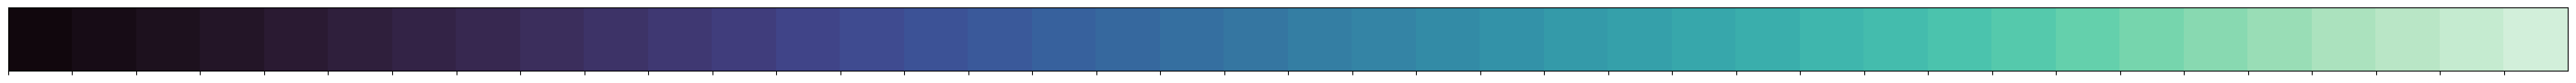

In [8]:
current_palette = sns.color_palette('mako', 40)
sns.palplot(current_palette)

## Загрузка данных

In [14]:
# Загрузка данных
train_path = "dataset/train.csv"
test_path = "dataset/test.csv"

data = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

# Просмотр первых строк
print(data.head().to_string(index=False))


 id  Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration          Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type  Premium Amount
  0 19.0 Female        10049.0        Married                   1.0      Bachelor's Self-Employed     22.598761    Urban       Premium              2.0         17.0         372.0                 5.0 2023-12-23 15:21:39.134960              Poor             No             Weekly         House          2869.0
  1 39.0 Female        31678.0       Divorced                   3.0        Master's           NaN     15.569731    Rural Comprehensive              1.0         12.0         694.0                 2.0 2023-06-12 15:21:39.111551           Average            Yes            Monthly         House          1483.0
  2 23.0   Male        25602.0       Divorced                   3.0     High

In [17]:
print(data_test.head().to_string(index=False))

     id  Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration          Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type
1200000 28.0 Female         2310.0            NaN                   4.0      Bachelor's Self-Employed      7.657981    Rural         Basic              NaN         19.0           NaN                 1.0 2023-06-04 15:21:39.245086              Poor            Yes             Weekly         House
1200001 31.0 Female       126031.0        Married                   2.0        Master's Self-Employed     13.381379 Suburban       Premium              NaN         14.0         372.0                 8.0 2024-04-22 15:21:39.224915              Good            Yes             Rarely     Apartment
1200002 47.0 Female        17092.0       Divorced                   0.0             PhD    Unemployed     24.354